In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading

In [6]:
df = pd.read_csv("House_data.csv")

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

In [12]:
df.drop(columns={'area_type','availability','society','balcony'}, inplace=True)

In [13]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df = df[df['bath'].isna()==False]

In [16]:
df.isna().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df = df[df['location'].isna()==False]

In [18]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df.shape

(13246, 5)

In [20]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df['Size'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [22]:
df.head()

,location,size,total_sqft,bath,price,Size
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
df.drop(columns={'size'}, inplace=True)

In [24]:
df.head()

,location,total_sqft,bath,price,Size
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [25]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df[~df['total_sqft'].apply(isfloat)].head(10)

,location,total_sqft,bath,price,Size
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [28]:
def convert_sqrt(x):
    tokens = x.split('-')
    if(len(tokens) == 2): 
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [29]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqrt)

In [30]:
df.loc[410]

location      Kengeri
total_sqft        NaN
bath              1.0
price            18.5
Size                1
Name: 410, dtype: object

## Feature Engineering

### Add a new feature: price per sqft

In [33]:
df['Price_per_sqft'] = df['price']*100000/df['total_sqft']

In [34]:
df.head()

,location,total_sqft,bath,price,Size,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### Handle mutliple locations by dimensionality reduction

In [36]:
df.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

In [37]:
df['location']=df['location'].apply(lambda x: x.strip())

In [38]:
location_stats = df['location'].value_counts(ascending=False)

In [39]:
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [40]:
locations_lessthan10 = location_stats[location_stats<=10]

In [41]:
len(locations_lessthan10)

1052

In [42]:
len(location_stats)

1293

In [43]:
1293-1052

241

In [44]:
df.location = df.location.apply(lambda x : 'Other' if x in locations_lessthan10 else x)

In [45]:
df.head(10)

,location,total_sqft,bath,price,Size,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Other,1020.0,6.0,370.00,6,36274.509804


In [46]:
df.groupby('location')['location'].agg('count')

location
1st Block Jayanagar           14
1st Phase JP Nagar            25
2nd Phase Judicial Layout     11
2nd Stage Nagarbhavi          24
5th Block Hbr Layout          12
                            ... 
Yelachenahalli                20
Yelahanka                    210
Yelahanka New Town            41
Yelenahalli                   13
Yeshwanthpur                  85
Name: location, Length: 242, dtype: int64

In [47]:
len(df['location'].unique())

242

## Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [49]:
df.head()

,location,total_sqft,bath,price,Size,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [50]:
df[df['total_sqft']/df['Size']<300]

,location,total_sqft,bath,price,Size,Price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,Other,1400.0,7.0,218.0,7,15571.428571
13279,Other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [51]:
df.shape

(13246, 6)

In [52]:
df = df[~(df['total_sqft']/df['Size']<300)]

In [53]:
df.shape

(12502, 6)

## Outlier Removal Using Standard Deviation and Mean

In [55]:
df['Price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [57]:
df.isna().sum()

location           0
total_sqft        46
bath               0
price              0
Size               0
Price_per_sqft    46
dtype: int64

In [58]:
df.dropna(inplace = True)

In [59]:
df.shape

(12456, 6)

In [60]:
def remove_outliers_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['Price_per_sqft'])
        sd = np.std(subdf['Price_per_sqft'])
        df_out = pd.concat([df_out,subdf[(subdf.Price_per_sqft>(m-sd)) & (subdf.Price_per_sqft<=(m+sd))]], ignore_index=True)
    return df_out

In [61]:
df = remove_outliers_pps(df)

In [62]:
df.shape

(10241, 6)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [64]:
def plot_prices(df, location):
    bhk2 = df[(df.location==location) & (df.Size==2)]
    bhk3 = df[(df.location==location) & (df.Size==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue',marker='*', label='2BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, color='red', marker='.', label='3BHK')
    plt.title(location)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.legend()

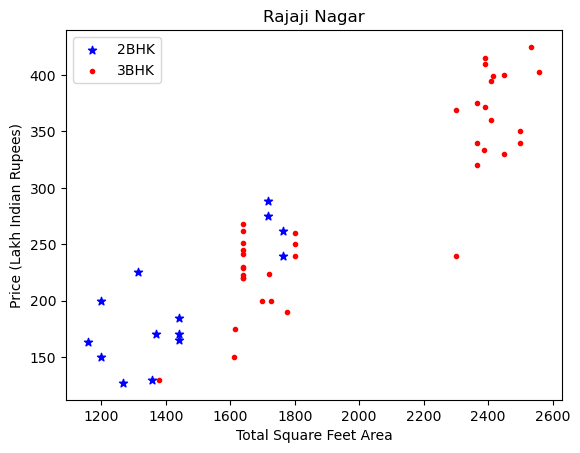

In [65]:
plot_prices(df, 'Rajaji Nagar')

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
##### {
#####    '1' : {
#####    'mean': 4000,
#####    'std: 2000,
#####    'count': 34
##### },
#####    '2' : {
#####    'mean': 4300,
#####    'std: 2300,
#####    'count': 22
##### },    
##### }
#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [67]:
def remove_outliers_price(df):
    exclude_indices = np.array([])
    for loc, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('Size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.Price_per_sqft),
                'std' : np.std(bhk_df.Price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('Size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
                

In [68]:
df = remove_outliers_price(df)

In [69]:
df.shape

(7329, 6)

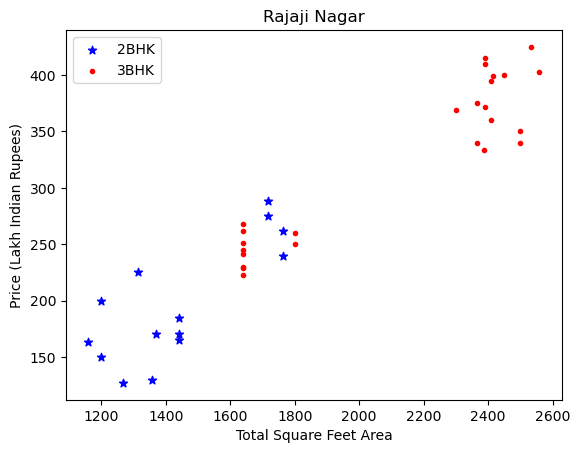

In [70]:
plot_prices(df, 'Rajaji Nagar')

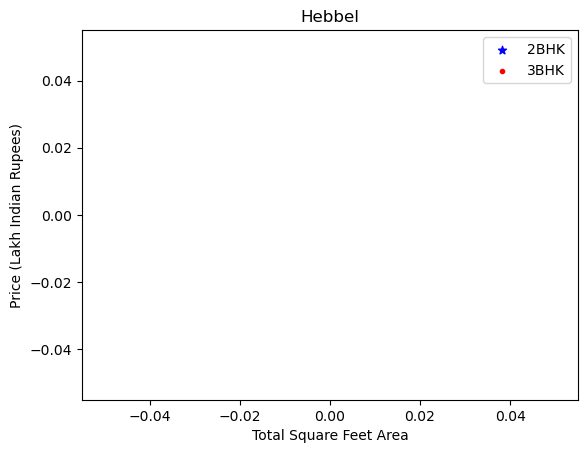

In [71]:
plot_prices(df, 'Hebbel')

##### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

### Outliers removal using bathroom feature

In [74]:
df.shape


(7329, 6)

In [75]:
df.head(10)

,location,total_sqft,bath,price,Size,Price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525


In [76]:
df['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [77]:
df[df.bath> df.Size+1]

,location,total_sqft,bath,price,Size,Price_per_sqft
36,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
530,Arekere,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...
9414,Vijayanagar,2100.0,6.0,252.0,4,12000.000000
9568,Whitefield,3850.0,5.0,316.0,3,8207.792208
9632,Whitefield,2700.0,5.0,175.0,3,6481.481481
9726,Whitefield,4003.0,6.0,300.0,4,7494.379216


In [78]:
df = df[~(df.bath>df.Size+1)]

In [79]:
df.shape

(7251, 6)

In [80]:
df.drop('Price_per_sqft', axis=1, inplace=True)

In [81]:
df.head()

,location,total_sqft,bath,price,Size
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### One hot encoding for location

In [83]:
locations = pd.get_dummies(df['location'])

In [84]:
locations.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
locations.drop('Other', inplace=True, axis=1)

In [86]:
locations.shape

(7251, 241)

In [87]:
df = pd.concat([df, locations], axis='columns')

In [88]:
df.head()

,location,total_sqft,bath,price,Size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
df.drop(columns={'location'}, inplace=True)

In [90]:
df.head()

,total_sqft,bath,price,Size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
df.shape

(7251, 245)

## Model training

In [93]:
x = df.drop('price', axis=1)
y = df['price']

In [94]:
x.shape

(7251, 244)

In [95]:
y.shape

(7251,)

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10) 

In [97]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)

LinearRegression()

In [98]:
lr_clf.score(x_test,y_test)

0.8691914452174369

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

## Predicting the test data

In [326]:
def predict(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if(loc_index>=0):
        a[loc_index]=1
    return lr_clf.predict([a])[0]

In [342]:
predict('Indira Nagar', 1000, 2, 2)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.37066882807497

## Importing the model

In [345]:
import pickle 
with open('house_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : 